In [1]:
import keras
import numpy as np
from keras.applications import vgg19
from keras.applications.vgg19 import preprocess_input
model = vgg19.VGG19(weights='imagenet', include_top=True)

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
image_path='/Users/Santiago/Documents/Database/davis-data/JPEGImages/480p/bear/00000.jpg'
image_path='/Users/Santiago/Documents/Database/davis-data/JPEGImages/480p/boat/00000.jpg'
image_path='/Users/Santiago/Documents/Database/davis-data/JPEGImages/480p/camel/00000.jpg'
#image_path='/Users/Santiago/Documents/Database/davis-data/JPEGImages/480p/blackswan/00000.jpg'

In [4]:
import matplotlib.pyplot as plt

In [5]:
def decode_vgg(x):
    xin=np.copy(x[:,:,:])
    xin=xin.astype('float32')
    xin[:,:,0]+=103.939
    xin[:,:,1]+=116.779
    xin[:,:,2]+=123.68
    return xin[:, :, ::-1]

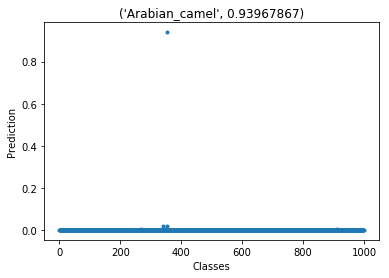

In [6]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img(image_path,target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x=x.astype('float32')
x = preprocess_input(x)
pred_class = model.predict(np.array(x))
dec_pred=vgg19.decode_predictions(pred_class)
#print(pred_class.shape)
num_classes=pred_class.shape[1]
plt.plot(pred_class[0,:],'.')
plt.xlabel('Classes')
plt.ylabel('Prediction')
plt.title(dec_pred[0][0][1:])
plt.show()
pred_class=np.argmax(pred_class)


In [7]:
from keras import losses
import keras.backend as K
input_class = K.zeros(shape=(1,num_classes))
loss = losses.categorical_crossentropy(input_class, model.output)
im_input = model.input # This is the input image
grads = K.gradients(loss, im_input)[0] # the signs will acheive the desired effect
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon()) # Normalize for numerical stability
outputs = [grads]
adv_noise = K.function([im_input, input_class], outputs)

In [8]:
xiter=x
pred_class = model.predict(np.reshape(np.array(x),[1,224,224,3]))
pred_class=np.argmax(pred_class)
label=np.zeros(num_classes)
label[pred_class]=1

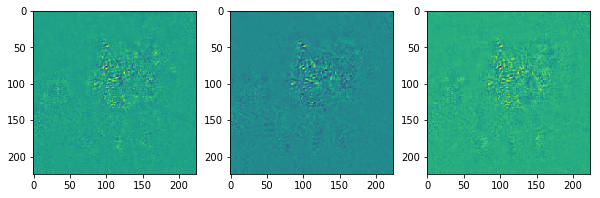

Range of Adversarial Noise
26.817408
-29.050468


In [9]:
S=adv_noise([xiter,np.expand_dims(label,0)])[0]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(S[0,:,:,0])
plt.subplot(132)
plt.imshow(S[0,:,:,1])
plt.subplot(133)
plt.imshow(S[0,:,:,2])
plt.show()

print('Range of Adversarial Noise')
print(S.max())
print(S.min())





In [12]:
from skimage.io import imsave

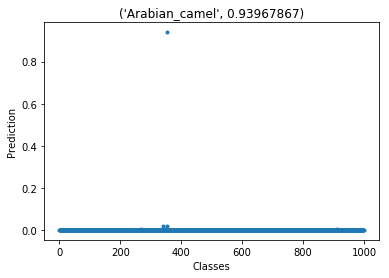

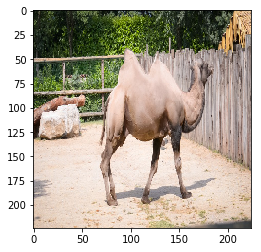

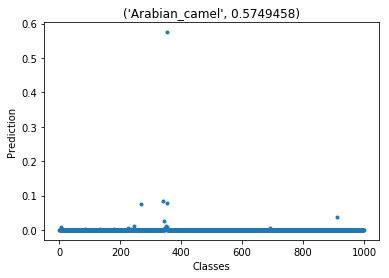

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


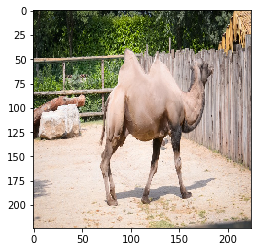

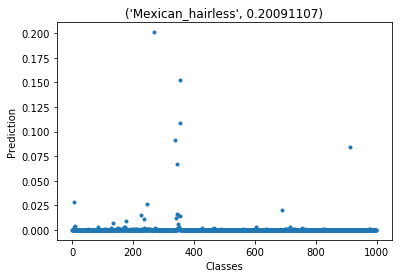

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


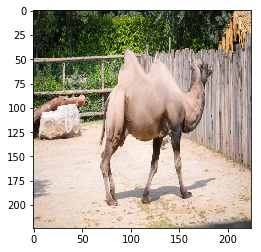

In [18]:
for c in range(3):
    Xadv=x+(c/10)*(S)
    pred_class_adv = model.predict(Xadv)
    dec_pred=vgg19.decode_predictions(pred_class_adv)
    plt.plot(pred_class_adv[0,:],'.')
    plt.xlabel('Classes')
    plt.ylabel('Prediction')
    plt.title(dec_pred[0][0][1:])
    plt.show()
    #pred_class_adv=np.argmax(pred_class_adv)
    temp=decode_vgg((Xadv)[0,:,:,:])
    plt.imshow(temp/255)
    plt.show()
    imsave('Adversarial'+str(c)+'.png',np.uint8(np.round(temp)))

In [14]:
temp

array([[[ 35.99643  ,  40.02469  ,  26.00679  ],
        [ 19.030037 ,  22.063454 ,  15.040497 ],
        [ 26.981071 ,  32.99093  ,  20.986443 ],
        ...,
        [214.91559  , 172.94498  , 134.95447  ],
        [232.03296  , 208.05652  , 162.05183  ],
        [218.01602  , 185.02434  , 144.02408  ]],

       [[ 32.00344  ,  36.041718 ,  21.022453 ],
        [ 16.04506  ,  21.087257 ,  14.0653305],
        [ 32.96708  ,  38.971825 ,  26.972725 ],
        ...,
        [221.76428  , 186.89517  , 148.86607  ],
        [240.89508  , 211.98108  , 169.97087  ],
        [226.86554  , 192.89114  , 154.91269  ]],

       [[ 60.936974 ,  67.97911  ,  49.966305 ],
        [ 15.964935 ,  21.011238 ,  13.9949875],
        [ 37.899963 ,  43.902306 ,  31.906685 ],
        ...,
        [224.9801   , 193.27904  , 152.10135  ],
        [217.03592  , 180.23346  , 138.12743  ],
        [198.85812  , 159.92795  , 120.92407  ]],

       ...,

       [[212.66211  , 189.60873  , 171.74701  ],
        [22

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.00679165  0.02468509 -0.00357145]
  [ 0.04049327  0.06345011  0.03003688]
  [-0.01356104 -0.00907054 -0.01892956]
  ...
  [-0.04552738 -0.05502726 -0.08441204]
  [ 0.05183164  0.05651322  0.03295162]
  [ 0.02408575  0.02433449  0.01602964]]

 [[ 0.02245387  0.0417193   0.00344164]
  [ 0.06533069  0.0872582   0.04505778]
  [-0.02727301 -0.02817405 -0.03292154]
  ...
  [-0.1339266  -0.10483392 -0.23570867]
  [-0.02913273 -0.01892151 -0.10491635]
  [-0.08731697 -0.10885581 -0.13445462]]

 [[-0.03369498 -0.02088913 -0.06302523]
  [-0.00501277  0.01123703 -0.03506269]
  [-0.09331279 -0.09769432 -0.10003582]
  ...
  [ 0.10135692  0.27903953 -0.01990855]
  [ 0.12743004  0.233459    0.03592229]
  [-0.07593244 -0.07204258 -0.14186852]]

 ...

 [[-0.25299242 -0.3912675  -0.33788428]
  [-0.08234442 -0.2190274  -0.17047724]
  [ 0.04825785  0.03397901  0.03457249]
  ...
  [-0.04678763  0.07196046  0.01902624]
  [-0.01939878  0.07116305  0.01853458]
  [-0.03226718  0.02064241 -0.01472647]]

 [

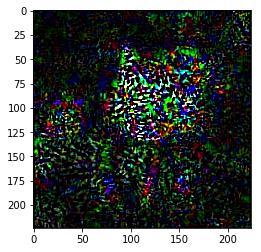

In [27]:
print(((c/10)*(S))[0,:,:,:])
plt.imshow(((c/10)*(S))[0,:,:,:])
plt.show()

In [28]:
imsave('Noise.png',((c/10)*(S))[0,:,:,:])

ValueError: Images of type float must be between -1 and 1.